In [1]:
from tifffile import imread
import os
from os.path import exists
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

In [20]:
um_per_pixel = 0.117
folder_save = "/Users/GGM/Documents/Graduate_Work/Nils_Walter_Lab/Writing/MyPublications/ResearchArticle-JPCB/Revision1"
os.chdir(folder_save)

img = imread("HOPS cell image.tif")

cmap_color_start = "black"
cmap_color_end = "#317EC2"
cmap_name = "dark2blue"
cmap = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
    N=200,
)

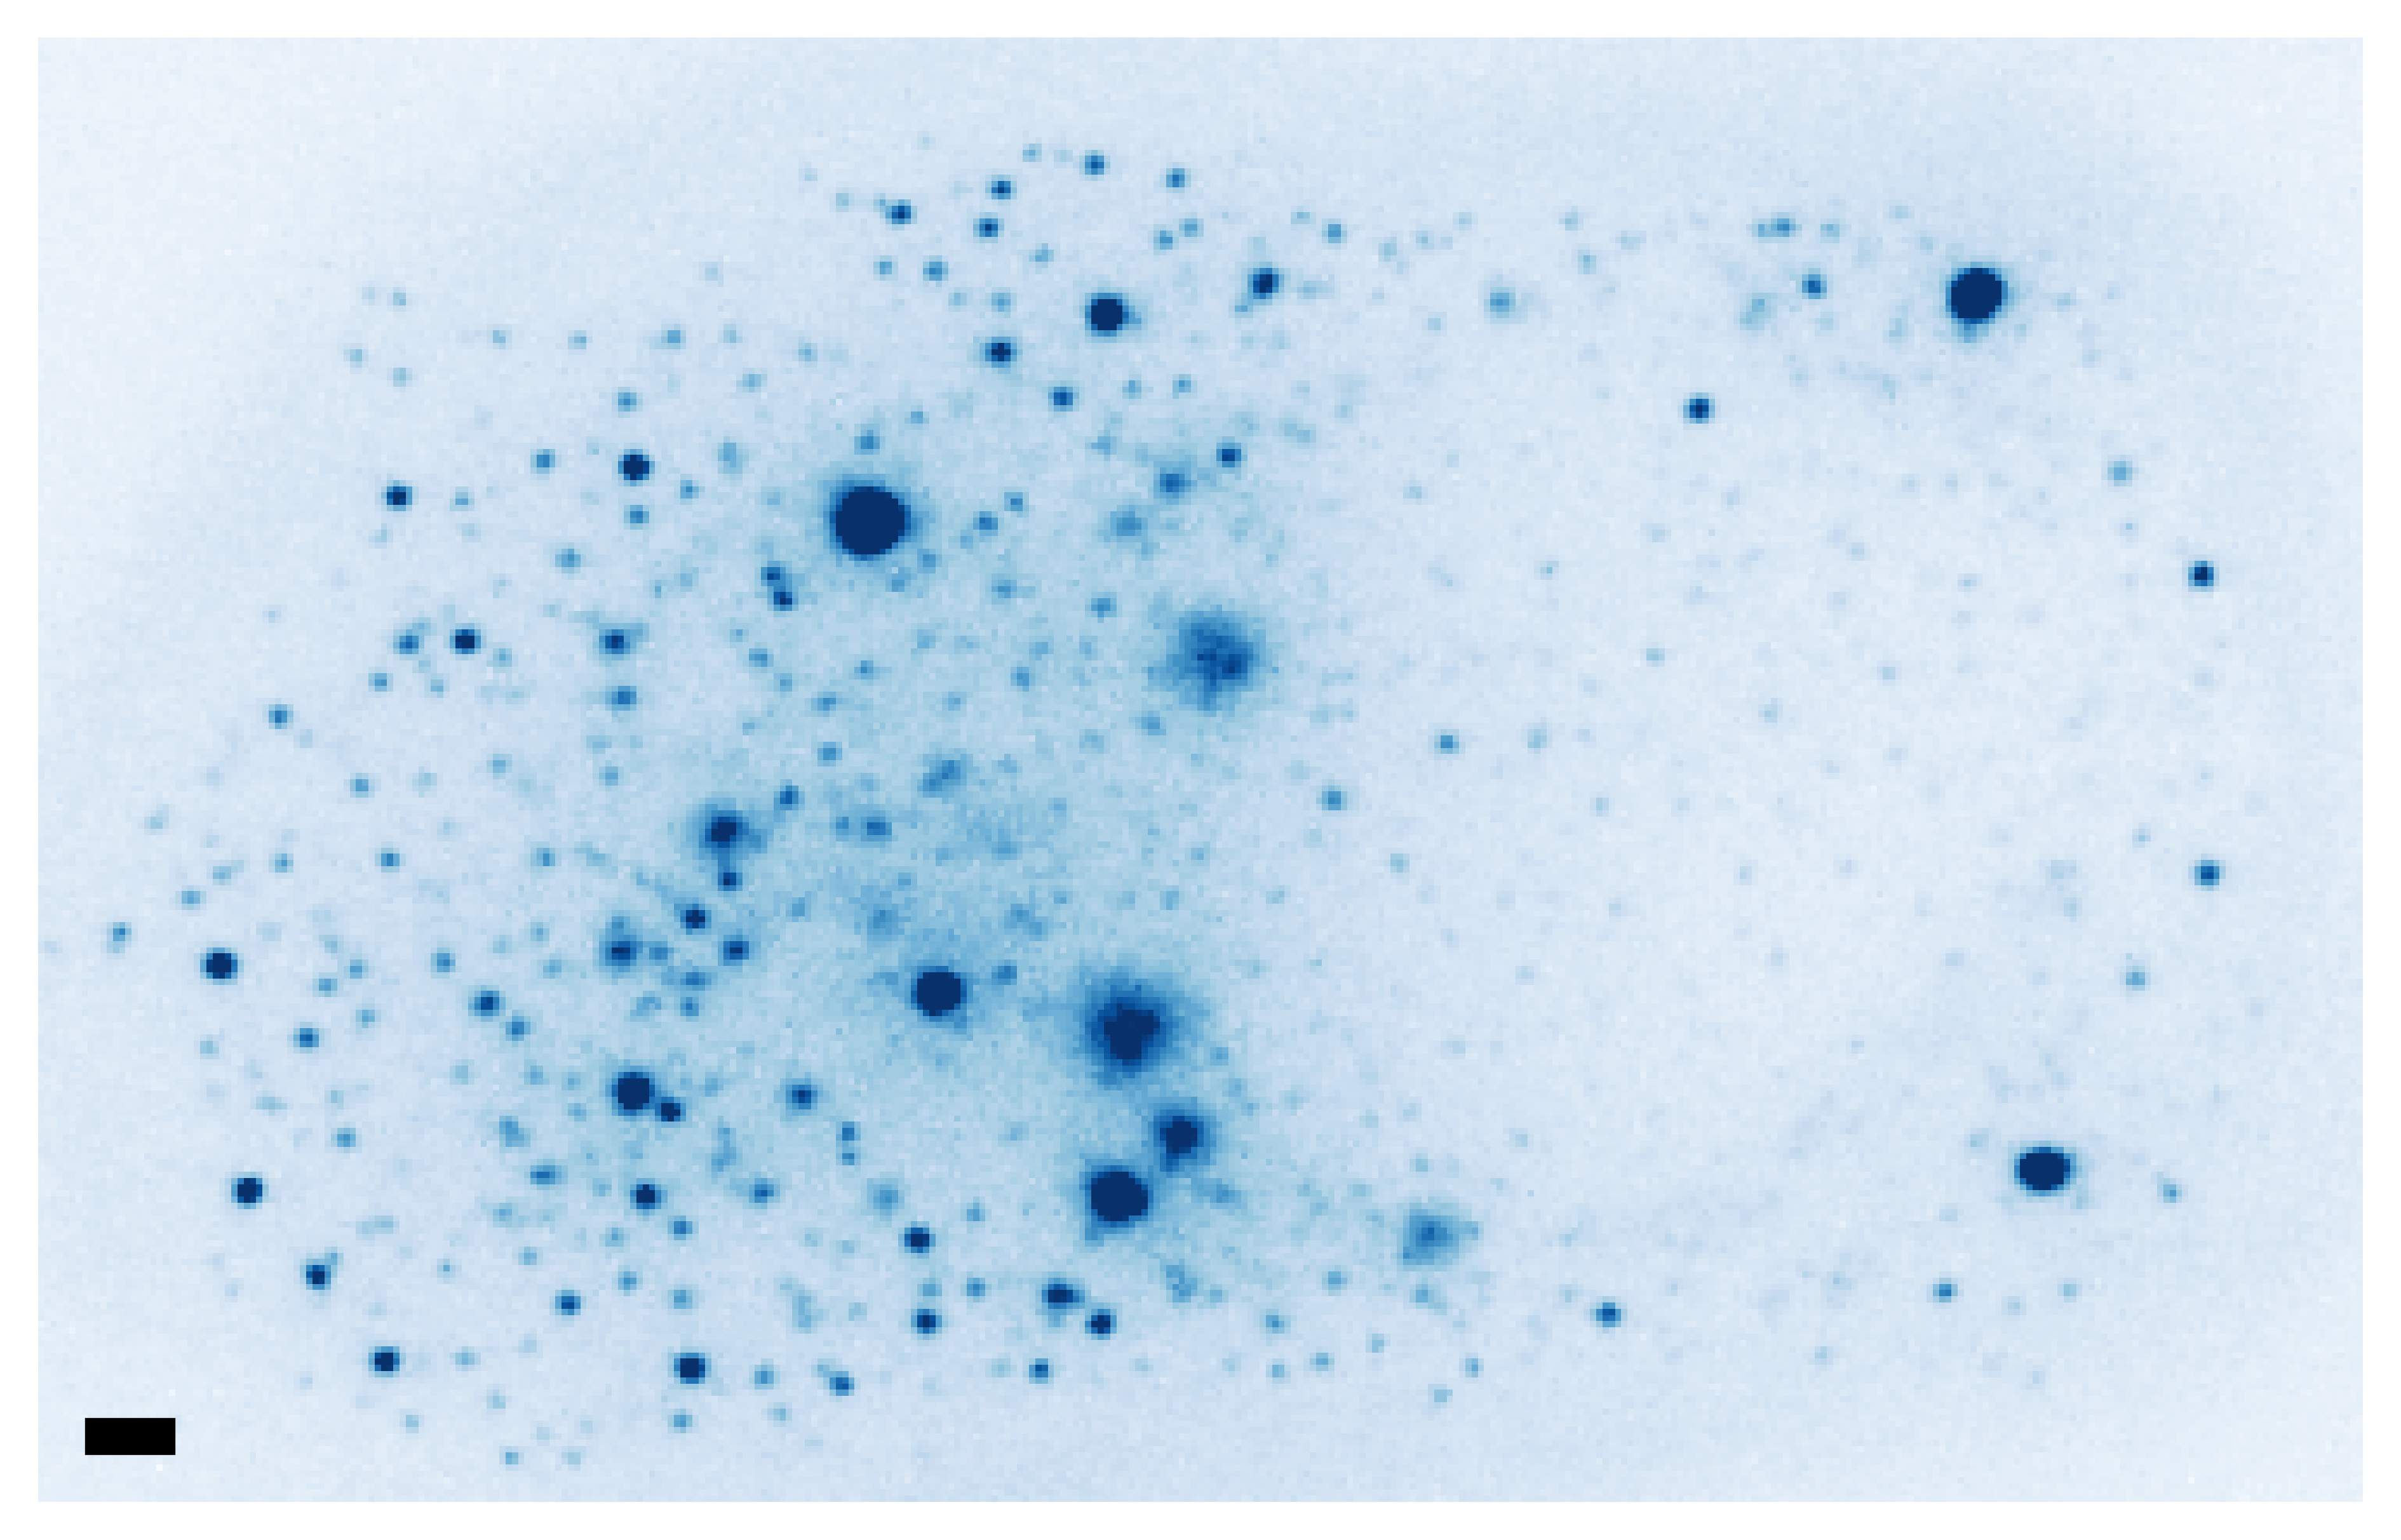

In [33]:
plow = 0  # imshow intensity percentile
phigh = 99.5
scalebar_color = "black"
scale_bar_offset = 10
scalebar_length_um = 1
scalebar_length_pxl = scalebar_length_um / um_per_pixel
saving_switch = True

img_toplot = img[30:-20, 40:-30]

plt.figure(dpi=600)
# Contrast stretching
vmin, vmax = np.percentile(img_toplot, (plow, phigh))
plt.imshow(img_toplot, cmap="Blues", vmin=vmin, vmax=vmax)
plt.xlim(0, img_toplot.shape[0])
plt.ylim(0, img_toplot.shape[1])
plt.tight_layout()
plt.axis("scaled")
plt.axis("off")


# plot scale bar
plt.plot(
    [scale_bar_offset, scale_bar_offset + scalebar_length_pxl],
    [scale_bar_offset, scale_bar_offset],
    "-",
    color=scalebar_color,
    lw=7,
)

if saving_switch:
    plt.savefig("JPCB_Fig1_real_cell.png", format="png", bbox_inches="tight")

plt.show()